In [7]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [8]:
train_url = "C:/Users/kamyar.manshaei/Desktop/Kaggle/Google Competition/train5.csv"
train = pd.read_csv(train_url)
test_url = "C:/Users/kamyar.manshaei/Desktop/Kaggle/Google Competition/test5.csv"
test = pd.read_csv(test_url)

# <font color='red'> Normalization of numerics

As all of the columns are numerics, we don't need to look for numerics. It's worth to mention that we are going to normalize columns with more than 2 different values, in order to skip boolean columns. For normalization, log transform has been used:

### <font color='blue'> Histograms before normalization

But before going to the normalization, we are going to take a look into the histograms, to see whether there are skewed columns or not. It also helps us to compare the numeric columns before and after normalization:  

browser


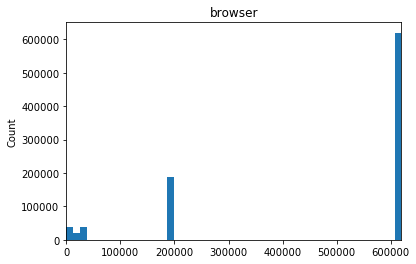

operatingSystem


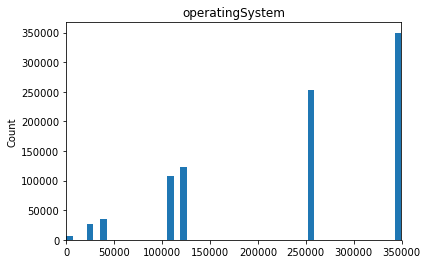

isMobile


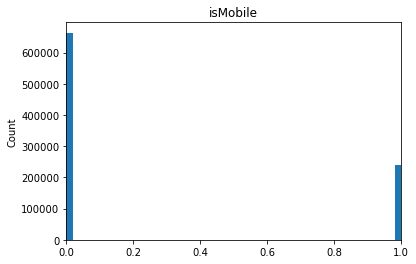

deviceCategory


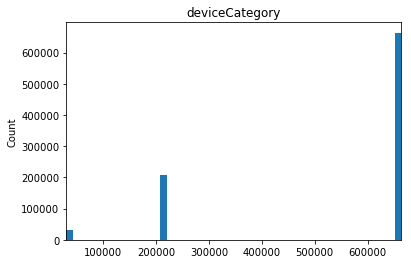

hits


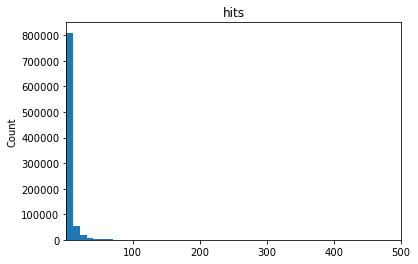

pageviews


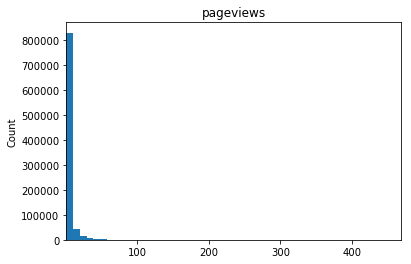

bounces


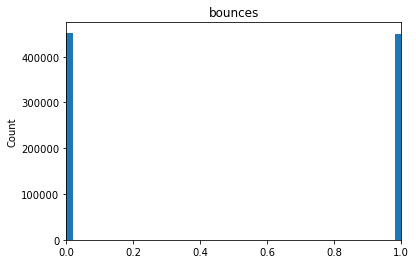

newVisits


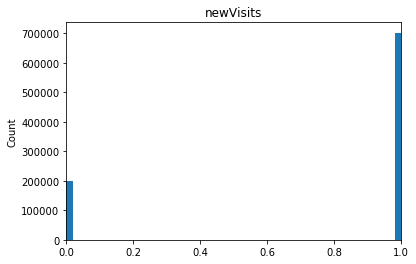

transactionRevenue


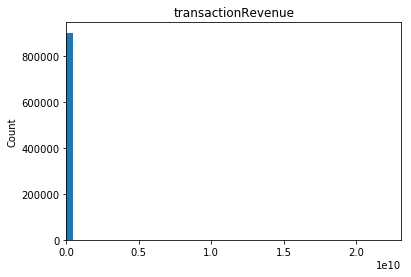

subContinent


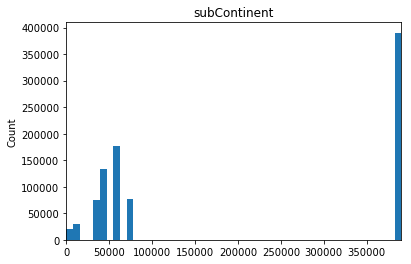

country


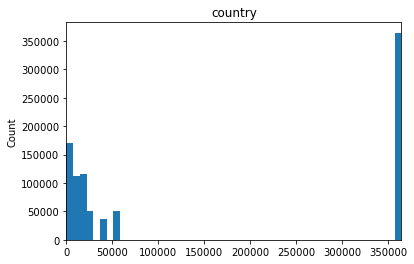

city


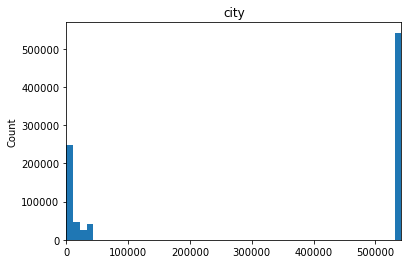

campaign


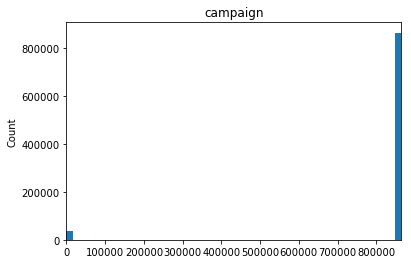

source


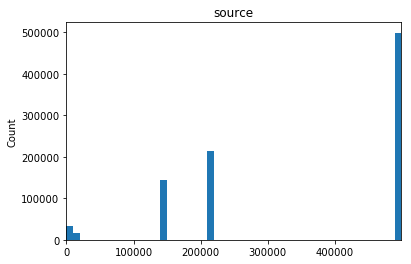

medium


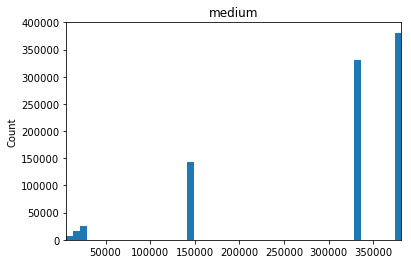

isTrueDirect


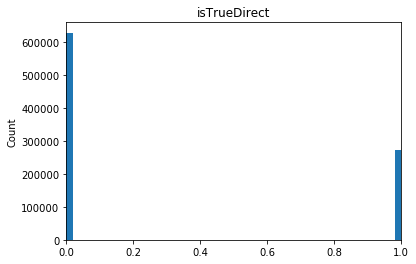

isVideoAd


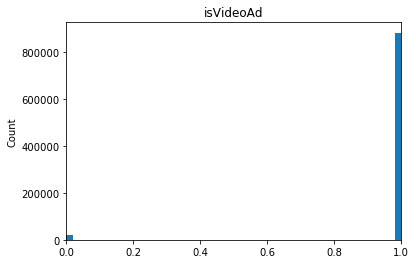

channelGrouping


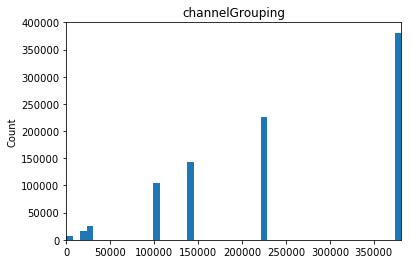

visitNumber


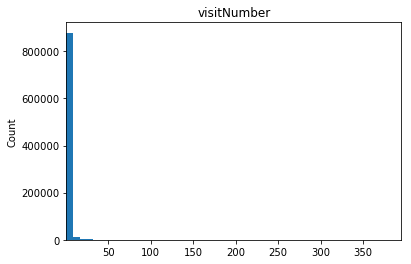

year


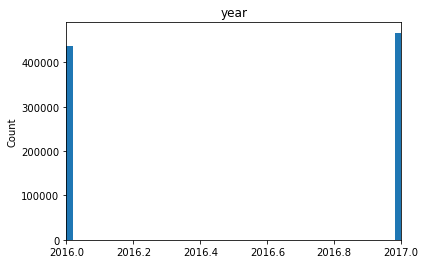

month


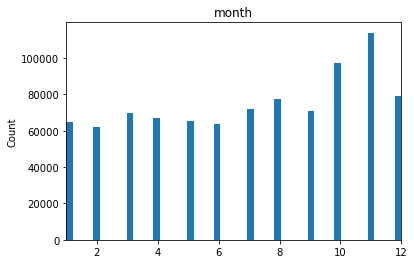

day


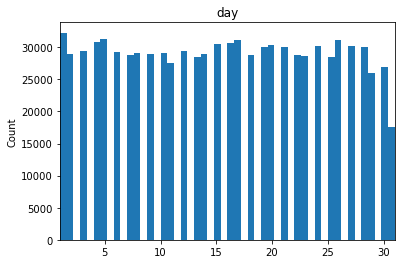

weekday


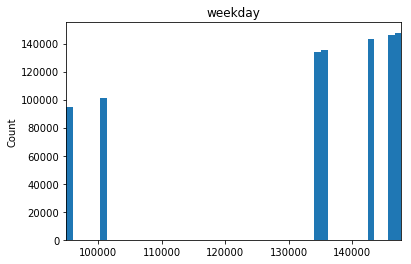

partOfDay


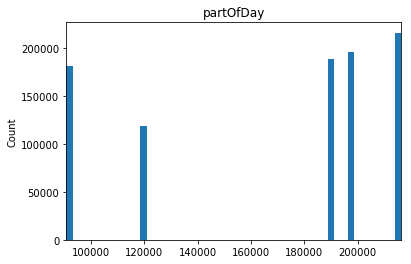

domain


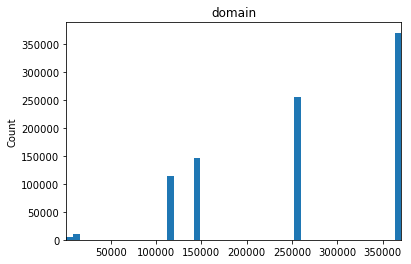

In [3]:
for col in train.columns.values:
    if col != 'sessionId':
        print(col)
        x = train[col]
        plt.hist(x, bins = 50)
        plt.ylabel('Count')
        plt.title(col)
        plt.xlim(xmin= min(train[col].unique()) , xmax = max(train[col].unique()))
        plt.show()

### <font color='blue'> Normalization

In [13]:
for col in train.columns.values:
    if col != 'sessionId' :
        if len(train[col].unique().tolist()) > 2:
            train[col] = train[col].apply(np.log1p)
            if col != 'transactionRevenue':
                test[col] = test[col].apply(np.log1p)

### <font color='blue'> Histograms after normalization

browser


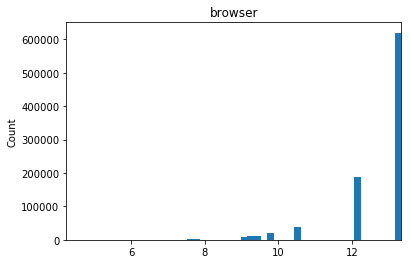

operatingSystem


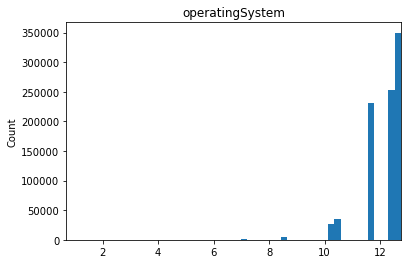

isMobile


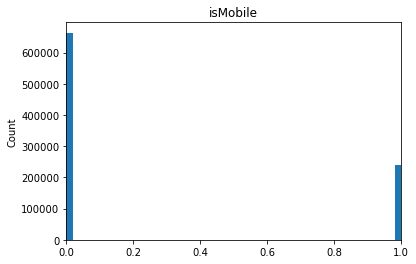

deviceCategory


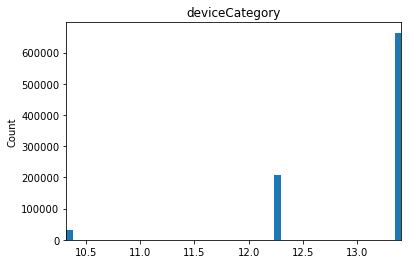

hits


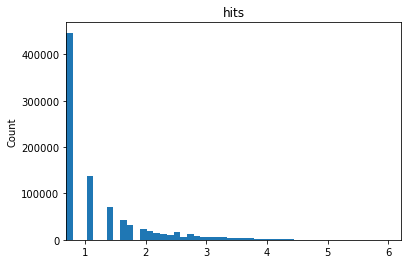

pageviews


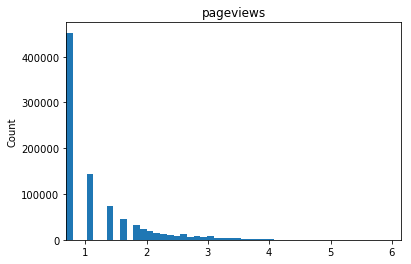

bounces


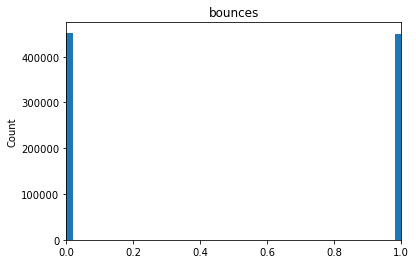

newVisits


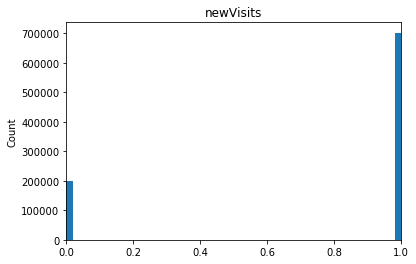

transactionRevenue


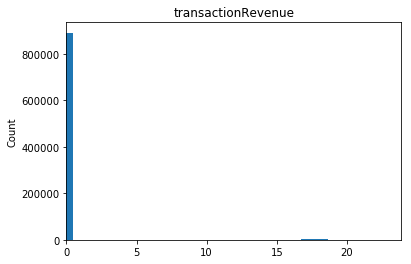

subContinent


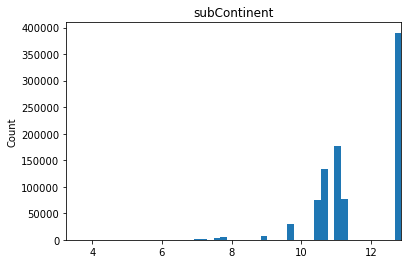

country


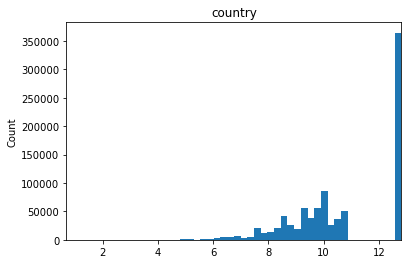

city


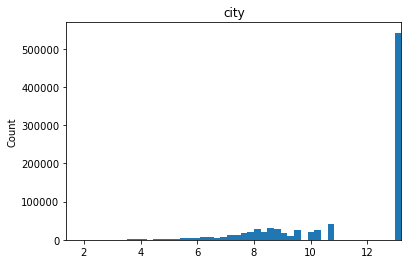

campaign


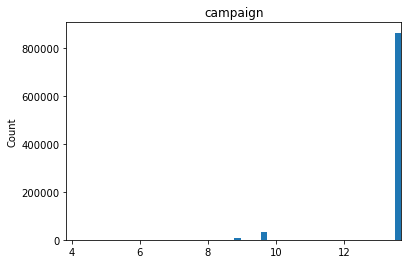

source


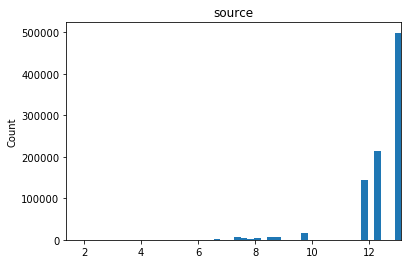

medium


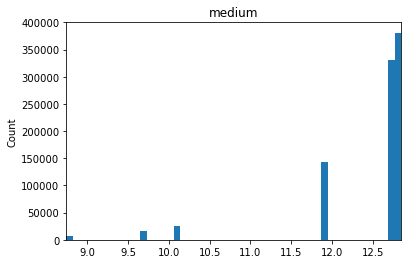

isTrueDirect


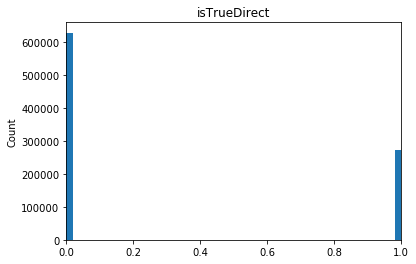

isVideoAd


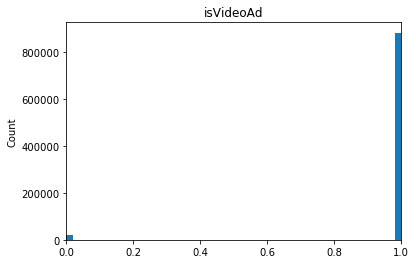

channelGrouping


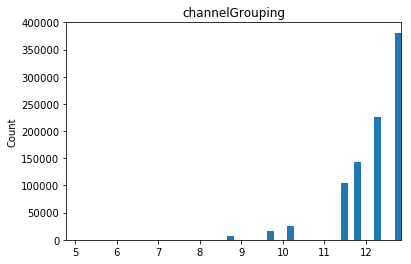

visitNumber


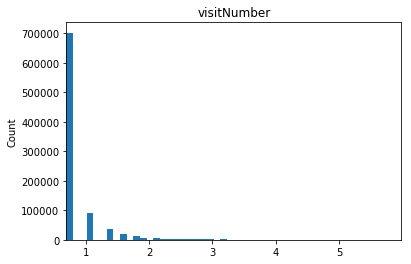

year


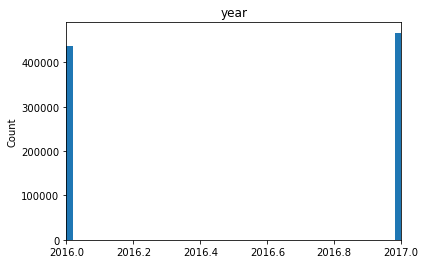

month


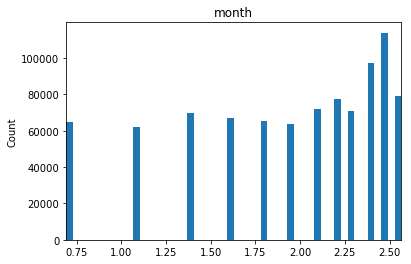

day


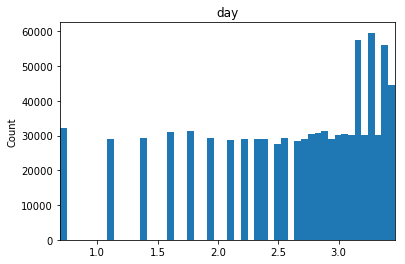

weekday


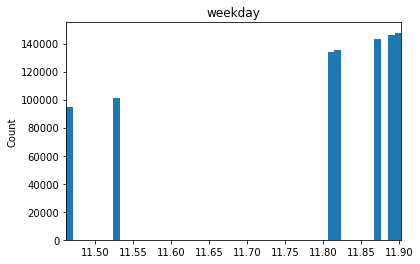

partOfDay


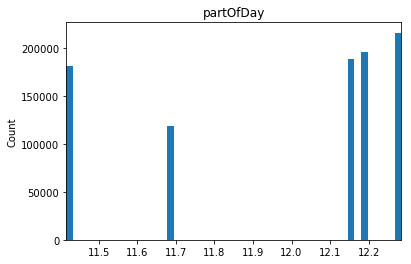

domain


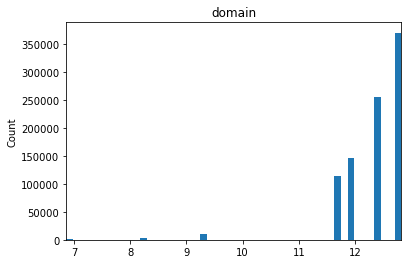

In [5]:
for col in train.columns.values:
    if col != 'sessionId':
        print(col)
        x = train[col]
        plt.hist(x, bins = 50)
        plt.ylabel('Count')
        plt.title(col)
        plt.xlim(xmin= min(train[col].unique()) , xmax = max(train[col].unique()))
        plt.show()

# <font color='red'> Writing the final dataframe to .csv

In [14]:
train.to_csv('train6.csv', index=False, encoding='utf-8')
test.to_csv('test6.csv', index=False, encoding='utf-8')